#### Melbourne_housing_FULL.csv was obtained from kaggle.com
Link: **

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **EXPLORATORY DATA ANALYSIS: DATA PREPROCESSING**

In [36]:
# loading and gathering insights about the dataset
df = pd.read_csv("../Datasets/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Understanding the dataset

In [37]:
unique_counts = df.nunique()
print(unique_counts)

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

##### (i). Handling Missing Values

**Data Cleaning:**

        - to remove (drop) rows with missing values from the important columns, imputting would cause a huge error risk
        - to handle missing values in the remaining columns (either imputing or dropping the records)
        - in this dataset are potential outliers, they are expected to be valid since many factors are
          considered in house pricing

**High Priority Features (As per dataset requirement):**

        - bedrooms (Bedroom2, Bathroom)
        - square footage (Landsize)
        - age (YearBuilt)
        - location(RegionName, Suburb)
        - previous sale prices (Price)

In [39]:
# noting down not needed columns to remove them
unwanted_cols = ['Lattitude', 'Longtitude', 'Method', 'Distance', 'Date', 'Postcode']
df.drop(unwanted_cols, axis=1, inplace=True)

To minimize the risk of errors, we'll drop records with missing prices as Price is the high-importance dependent variable

In [40]:
# dropping rows missing Price
df.dropna(subset=['Price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   SellerG        27247 non-null  object 
 6   Bedroom2       20806 non-null  float64
 7   Bathroom       20800 non-null  float64
 8   Car            20423 non-null  float64
 9   Landsize       17982 non-null  float64
 10  BuildingArea   10656 non-null  float64
 11  YearBuilt      12084 non-null  float64
 12  CouncilArea    27244 non-null  object 
 13  Regionname     27244 non-null  object 
 14  Propertycount  27244 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 3.3+ MB


To fill missing values using using the mean in each column to minimize errors

We'll encode categorical data first using LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder
# encoding categorical variables
le = LabelEncoder()
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  int64  
 1   Address        27247 non-null  int64  
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  int64  
 4   Price          27247 non-null  float64
 5   SellerG        27247 non-null  int64  
 6   Bedroom2       20806 non-null  float64
 7   Bathroom       20800 non-null  float64
 8   Car            20423 non-null  float64
 9   Landsize       17982 non-null  float64
 10  BuildingArea   10656 non-null  float64
 11  YearBuilt      12084 non-null  float64
 12  CouncilArea    27247 non-null  int64  
 13  Regionname     27247 non-null  int64  
 14  Propertycount  27244 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 3.3 MB


In [43]:
# filling NaNs with the mean in each column
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  int64  
 1   Address        27247 non-null  int64  
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  int64  
 4   Price          27247 non-null  float64
 5   SellerG        27247 non-null  int64  
 6   Bedroom2       27247 non-null  float64
 7   Bathroom       27247 non-null  float64
 8   Car            27247 non-null  float64
 9   Landsize       27247 non-null  float64
 10  BuildingArea   27247 non-null  float64
 11  YearBuilt      27247 non-null  float64
 12  CouncilArea    27247 non-null  int64  
 13  Regionname     27247 non-null  int64  
 14  Propertycount  27247 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 3.3 MB


In [44]:
df.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
1,0,25617,2,0,1480000.0,32,2.0,1.0,1.0,202.0,156.834586,1966.609153,31,2,4019.0
2,0,12162,2,0,1035000.0,32,2.0,1.0,0.0,156.0,79.000000,1900.000000,31,2,4019.0
4,0,19857,3,0,1465000.0,32,3.0,2.0,0.0,134.0,150.000000,1900.000000,31,2,4019.0
5,0,18371,3,0,850000.0,32,3.0,2.0,1.0,94.0,156.834586,1966.609153,31,2,4019.0
6,0,21399,4,0,1600000.0,206,3.0,1.0,2.0,120.0,142.000000,2014.000000,31,2,4019.0


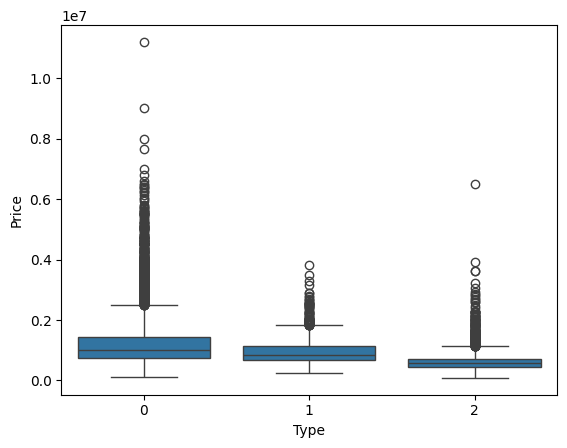

In [45]:
sns.boxplot(data=df, x='Type', y='Price')
plt.show()

(180.0, 200.0)

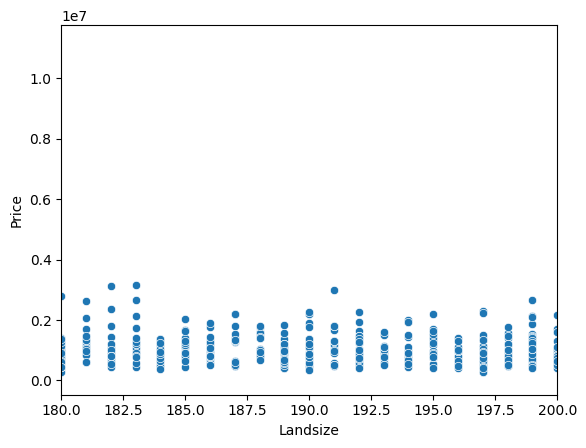

In [46]:
sns.scatterplot(data=df, x='Landsize', y='Price')
plt.xlim(left=180, right=200)  # Adjust "right" to extend the x-axis